# Team Benchmark

**Authors:** Marissa Nicole Esteban, Gabe Krishnadasan, Diana Montoya-Herrera, Gabe Seidl, Madeleine Woo, Daniel Matlock

**Date:** 10/5/2023

### Wave Height

#### Dataset: https://www.kaggle.com/code/shaltaf/the-prediction-of-significant-wave-height-hs/notebook 

## Table of Contents:
* [Data Importing and Pre-processing](#data-importing)
* [Data Analysis and Visualization](#data-vis)
* [Data Analytics](#data-analytics)

In [55]:
# import libraries needed
from seebuoy import NDBC
from IPython.display import display
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, skew, probplot
from scipy.special import boxcox1p
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import sys
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [56]:
import pandas as pd
from seebuoy import NDBC

In [57]:
ndbc = NDBC()

In [58]:
df_avail = ndbc.available_data(station_id="44065")

In [59]:
df_data = ndbc.get_data("44097")

df_data

,wind_direction,wind_speed,wind_gust,wave_height,dominant_period,average_period,mean_wave_direction,pressure,air_temp,water_temp,dewpoint,visibility,pressure_tendency,tide
date,,,,,,,,,,,,,,
2024-02-24 00:26:00,NaN,NaN,NaN,1.7,7,6.5,193,NaN,NaN,5.2,NaN,NaN,NaN,NaN
2024-02-24 00:56:00,NaN,NaN,NaN,1.8,8,6.5,190,NaN,NaN,5.2,NaN,NaN,NaN,NaN
2024-02-24 01:26:00,NaN,NaN,NaN,1.9,8,6.9,187,NaN,NaN,5.2,NaN,NaN,NaN,NaN
2024-02-24 01:56:00,NaN,NaN,NaN,1.8,8,6.8,184,NaN,NaN,5.2,NaN,NaN,NaN,NaN
2024-02-24 02:26:00,NaN,NaN,NaN,1.9,8,7.0,186,NaN,NaN,5.2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-09 18:56:00,NaN,NaN,NaN,0.6,10,6.4,107,NaN,NaN,8.4,NaN,NaN,NaN,NaN
2024-04-09 19:26:00,NaN,NaN,NaN,0.6,10,6.6,113,NaN,NaN,8.5,NaN,NaN,NaN,NaN
2024-04-09 19:56:00,NaN,NaN,NaN,0.7,11,6.4,114,NaN,NaN,9.5,NaN,NaN,NaN,NaN


In [60]:
# dropping cols where there is 100% NA
df_data.dropna(axis=1, how='all', inplace=True)

# dropping rows where average_period is null
df_data.dropna(subset=['average_period'], inplace=True)

# dropping rows wehre wave_height is null
df_data.dropna(subset=['wave_height'], inplace=True)

In [61]:
# missing data
total_na = df_data.isnull().sum().sort_values(ascending=False)

total_rows = df_data.isnull().count()
percent = (df_data.isnull().sum()/df_data.isnull().count()).sort_values(ascending=False) * 100
missing_data = pd.concat([total_na, total_rows, percent], axis=1, keys=['Total NA', 'Total Rows', 'Percent'])
missing_data

,Total NA,Total Rows,Percent
wave_height,0,2177,0.0
dominant_period,0,2177,0.0
average_period,0,2177,0.0
mean_wave_direction,0,2177,0.0
water_temp,0,2177,0.0


In [62]:
df_data

,wave_height,dominant_period,average_period,mean_wave_direction,water_temp
date,,,,,
2024-02-24 00:26:00,1.7,7,6.5,193,5.2
2024-02-24 00:56:00,1.8,8,6.5,190,5.2
2024-02-24 01:26:00,1.9,8,6.9,187,5.2
2024-02-24 01:56:00,1.8,8,6.8,184,5.2
2024-02-24 02:26:00,1.9,8,7.0,186,5.2
...,...,...,...,...,...
2024-04-09 18:56:00,0.6,10,6.4,107,8.4
2024-04-09 19:26:00,0.6,10,6.6,113,8.5
2024-04-09 19:56:00,0.7,11,6.4,114,9.5


In [63]:
df_data = df_data.reset_index()
#ny_buoy["average_period_0_for_null"] = ny_buoy["average_period"].fillna(0)

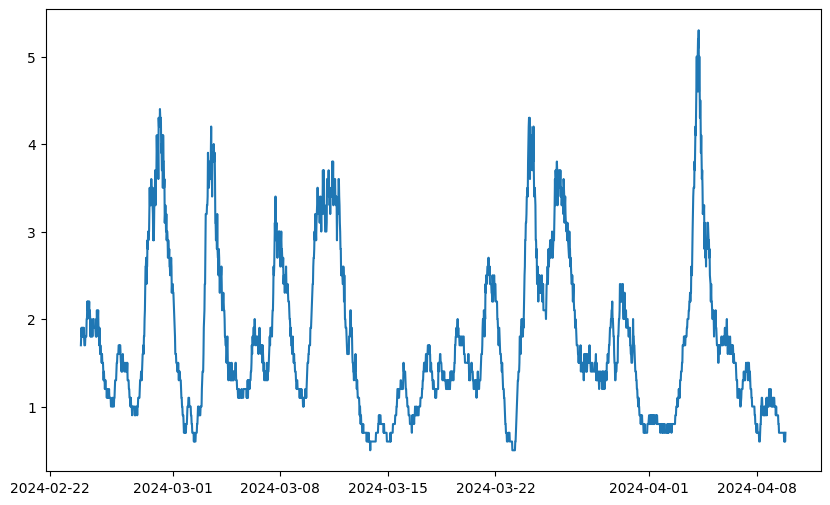

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(df_data["date"], df_data["wave_height"]) # including NULL values

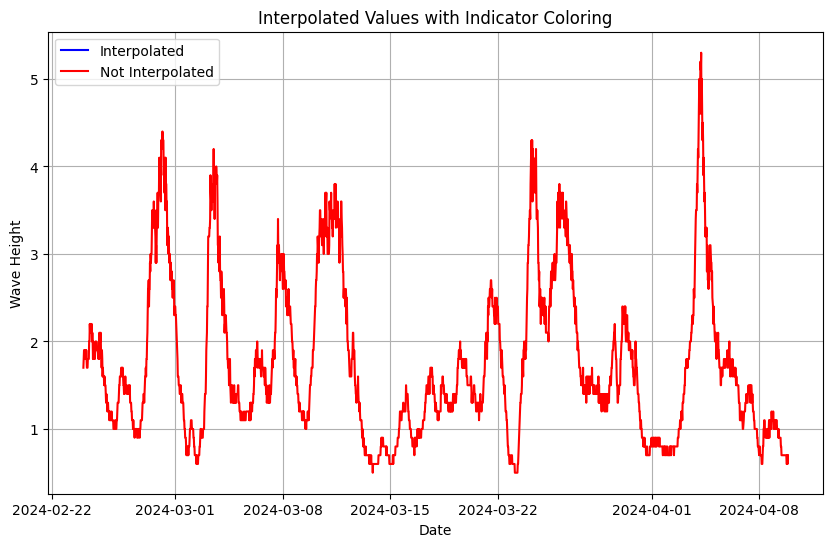

In [65]:
# lets limit the df to 2 columns: date and wave height
ny_buoy_df = df_data[["date","wave_height"]]

# Set 'date' column as the index
ny_buoy_df = ny_buoy_df.set_index("date")

ny_buoy_df['wave_height_interpolated'] = ny_buoy_df['wave_height'].interpolate(method='time') # interpolate missing values based on time
ny_buoy_df['interpolation_indicator'] = ny_buoy_df['wave_height'].isna()

ny_buoy_df = ny_buoy_df.reset_index()

plt.figure(figsize=(10, 6))
#plt.plot(ny_buoy_df["average_period"]) # interpolated NULL values

plt.plot(ny_buoy_df['date'][ny_buoy_df['interpolation_indicator']], ny_buoy_df['wave_height_interpolated'][ny_buoy_df['interpolation_indicator']], color='blue', label='Interpolated')
plt.plot(ny_buoy_df['date'], ny_buoy_df['wave_height'], color='red', label='Not Interpolated')

plt.xlabel('Date')
plt.ylabel('Wave Height')
plt.title('Interpolated Values with Indicator Coloring')
plt.legend()

plt.grid(True)
plt.show()

In [66]:
# lets use the interpolated values and see how good we are at modeling the future
from prophet import Prophet

In [67]:
modeling_df = ny_buoy_df[["date","wave_height_interpolated"]]
modeling_df = modeling_df.rename(columns={"date": "ds", "wave_height_interpolated": "y"})
cap = 6

# Initialize Prophet model
modeling_df['cap'] = cap
model = Prophet(growth="logistic")
model.fit(modeling_df)

14:35:06 - cmdstanpy - INFO - Chain [1] start processing
14:35:06 - cmdstanpy - INFO - Chain [1] done processing


In [77]:
modeling_df

,ds,y,cap
0,2024-02-24 00:26:00,1.7,6
1,2024-02-24 00:56:00,1.8,6
2,2024-02-24 01:26:00,1.9,6
3,2024-02-24 01:56:00,1.8,6
4,2024-02-24 02:26:00,1.9,6
...,...,...,...
2172,2024-04-09 18:56:00,0.6,6
2173,2024-04-09 19:26:00,0.6,6
2174,2024-04-09 19:56:00,0.7,6
2175,2024-04-09 20:26:00,0.6,6


In [68]:
future = model.make_future_dataframe(periods=15)
future['cap'] = cap
forecast = model.predict(future)

In [69]:
forecast

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-02-24 00:26:00,1.989609,6,0.414995,2.492826,1.989609,1.989609,-0.556098,-0.556098,-0.556098,-0.001595,-0.001595,-0.001595,-0.554503,-0.554503,-0.554503,0.0,0.0,0.0,1.433511
1,2024-02-24 00:56:00,1.989354,6,0.295021,2.520650,1.989354,1.989354,-0.546431,-0.546431,-0.546431,0.006738,0.006738,0.006738,-0.553169,-0.553169,-0.553169,0.0,0.0,0.0,1.442923
2,2024-02-24 01:26:00,1.989099,6,0.366383,2.578034,1.989099,1.989099,-0.533806,-0.533806,-0.533806,0.017062,0.017062,0.017062,-0.550869,-0.550869,-0.550869,0.0,0.0,0.0,1.455292
3,2024-02-24 01:56:00,1.988843,6,0.436071,2.540106,1.988843,1.988843,-0.519286,-0.519286,-0.519286,0.028327,0.028327,0.028327,-0.547613,-0.547613,-0.547613,0.0,0.0,0.0,1.469558
4,2024-02-24 02:26:00,1.988588,6,0.369247,2.577763,1.988588,1.988588,-0.504433,-0.504433,-0.504433,0.038982,0.038982,0.038982,-0.543415,-0.543415,-0.543415,0.0,0.0,0.0,1.484155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,2024-04-20 20:56:00,1.477159,6,0.379359,2.491599,1.474467,1.479874,-0.039114,-0.039114,-0.039114,-0.053647,-0.053647,-0.053647,0.014533,0.014533,0.014533,0.0,0.0,0.0,1.438045
2188,2024-04-21 20:56:00,1.469359,6,0.538198,2.706480,1.466213,1.472419,0.171527,0.171527,0.171527,-0.053647,-0.053647,-0.053647,0.225174,0.225174,0.225174,0.0,0.0,0.0,1.640886
2189,2024-04-22 20:56:00,1.461586,6,0.255488,2.408890,1.457897,1.465065,-0.152392,-0.152392,-0.152392,-0.053647,-0.053647,-0.053647,-0.098745,-0.098745,-0.098745,0.0,0.0,0.0,1.309194
2190,2024-04-23 20:56:00,1.453841,6,0.082940,2.157847,1.449631,1.457808,-0.308906,-0.308906,-0.308906,-0.053647,-0.053647,-0.053647,-0.255259,-0.255259,-0.255259,0.0,0.0,0.0,1.144936


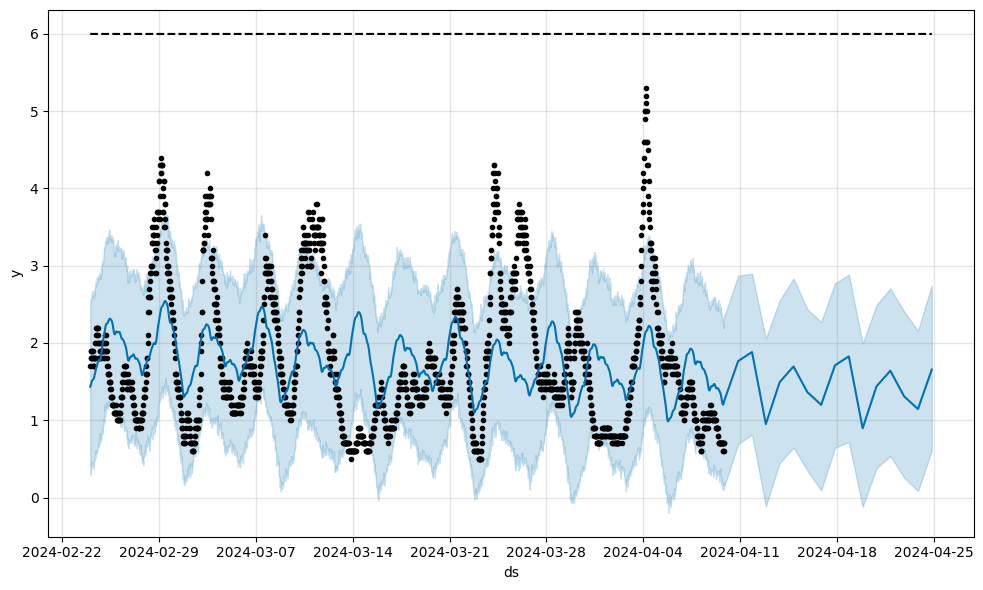

In [70]:
fig1 = model.plot(forecast)

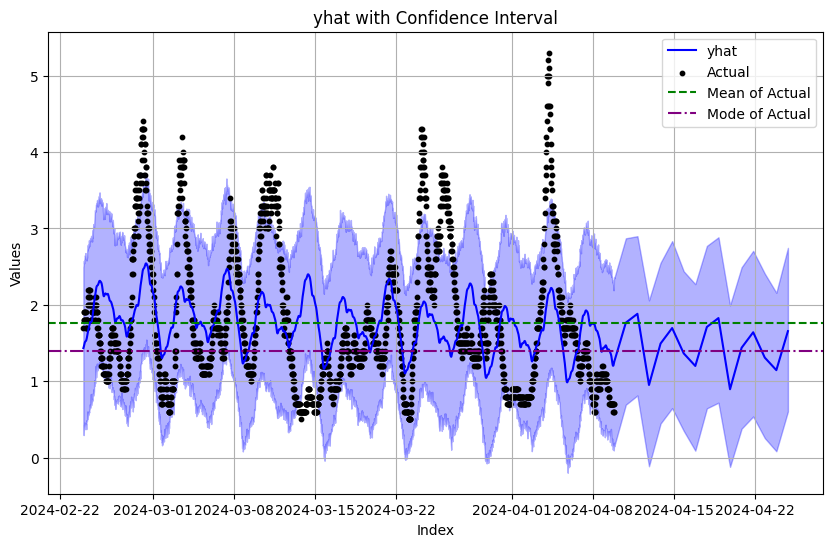

In [82]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(forecast['ds'], forecast['yhat'], label='yhat', color='blue')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.3)
plt.scatter(modeling_df['ds'], modeling_df['y'], label='Actual', color='black', marker='o', s=10)

mean_actual = modeling_df['y'].mean()
mode_actual = modeling_df['y'].mode()[0]

plt.axhline(mean_actual, color='green', linestyle='--', label='Mean of Actual')
plt.axhline(mode_actual, color='purple', linestyle='-.', label='Mode of Actual')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('yhat with Confidence Interval')
plt.legend()
plt.grid(True)
plt.show()